# Banking Bonanza

In this activity, you’ll use Pandas functions to perform both a high-level and a targeted analysis of trends in bank funding rates—that is, the bank’s cost to borrow money.

Instructions:

1. Import the Pandas and `pathlib` libraries.

2. Use `Path` with the `read_csv` function to read the CSV file into the DataFrame. Review the first five rows of the DataFrame to confirm the import.

3. Use the `plot` function to visualize how each of the rates in the DataFrame has evolved over time.

4. Use the `describe` function to generate the summary statistics for the DataFrame. Then use these statistics to determine the spread (or difference) between the average funding rate of the bank and the average prime rate that the bank charges its most credit-worthy customers. This spread quantifies one way that the bank profits from lending.

5. Use the `loc` function to create a new DataFrame that includes all the rows of only the Funding Rate column. Review this Funding Rate DataFrame by creating both a line plot and a histogram.

6. Use the `loc` function to create a new DataFrame that includes the data only from 2020. This new DataFrame should include all the columns of data. Review this 2020 DataFrame by creating a box plot to determine how the data was distributed during 2020.

7. Use conditional statements to filter and analyze the 2020 DataFrame. The goal is to compare the bank’s profits from the times that the funding rates were greater than or equal to 1% to the times that they were less than 1%.
  


## Step 1: Import the Pandas and `pathlib` libraries.

In [1]:
# Import the Pandas library
import pandas as pd


# Import the Path module from the pathlib library
from pathlib import Path

## Step 2: Use `Path` with the `read_csv` function to read the CSV file into the DataFrame. Review the first five rows of the DataFrame to confirm the import.

In [2]:
# Read in the CSV file called "lending_rates.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
lending_rates_df = pd.read_csv(
    Path("../Resources/lending_rates.csv"), 
    index_col='Date', 
    infer_datetime_format=True, 
    parse_dates=True
)

# Review the first 5 rows of the DataFrame
lending_rates_df.head()

,Funding Rate,Prime Rate,Retail Rate,Sub-prime Rate
Date,,,,
2019-01-01,1.49,2.70,4.69,7.77
2019-01-02,1.84,2.82,4.64,8.06
2019-01-03,1.69,2.92,4.61,8.08
2019-01-04,1.57,3.01,4.70,8.04
2019-01-05,1.30,2.94,5.05,7.95


## Step 3. se the `plot` function to visualize how each of the rates in the DataFrame has evolved over time.

<AxesSubplot:xlabel='Date'>

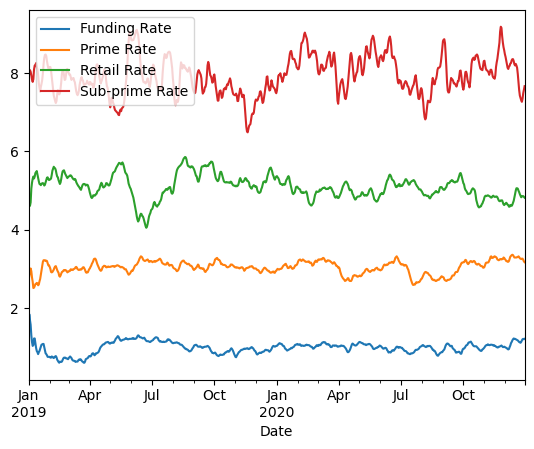

In [3]:
# Use the default line plot to vizualize the rates in the DataFrame
lending_rates_df.plot()

## Step 4: Use the `describe` function to generate the summary statistics for the DataFrame. Then use these statistics to determine the spread (or difference) between the average funding rate of the bank and the average prime rate that the bank charges its most credit-worthy customers. This spread quantifies one way that the bank profits from lending.

In [4]:
# Use the describe function to generate summary statistics for the DataFrame
lending_rates_df.describe()

,Funding Rate,Prime Rate,Retail Rate,Sub-prime Rate
count,730.000000,730.000000,730.000000,730.000000
mean,0.988342,3.036301,5.091781,7.933849
std,0.151529,0.167394,0.306843,0.480240
min,0.600000,2.510000,4.050000,6.490000
25%,0.900000,2.950000,4.900000,7.620000
50%,1.005000,3.050000,5.090000,7.910000
75%,1.070000,3.170000,5.280000,8.240000
max,1.840000,3.360000,5.860000,9.190000


**Question:** Can you quantify the spread, or difference between the bank's average funding rate and the average prime rate that it charges its most credit-worthy customers?

**Answer:** The average interest rate spread between the bank's funding rate and its `Prime Rate` customers is 2.05% (3.03-0.98).

## Step 5: Use the `loc` function to create a new DataFrame that includes all the rows of only the Funding Rate column. Review this Funding Rate DataFrame by creating both a line plot and a histogram.

In [5]:
# Use the loc function to create a `funding_rate` Series
# The Series should contains all rows for the "Funding Rate" column only
funding_rate = lending_rates_df.loc[:, 'Funding Rate']

# Review the top 5 rows of the `funding_rate` Series
funding_rate.head()

Date
2019-01-01    1.49
2019-01-02    1.84
2019-01-03    1.69
2019-01-04    1.57
2019-01-05    1.30
Name: Funding Rate, dtype: float64

<AxesSubplot:xlabel='Date'>

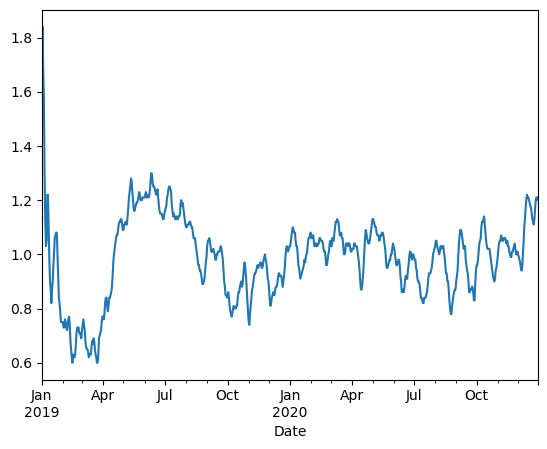

In [6]:
# Create a line plot to visualize how the funding rate values changed over time
funding_rate.plot()

<AxesSubplot:ylabel='Frequency'>

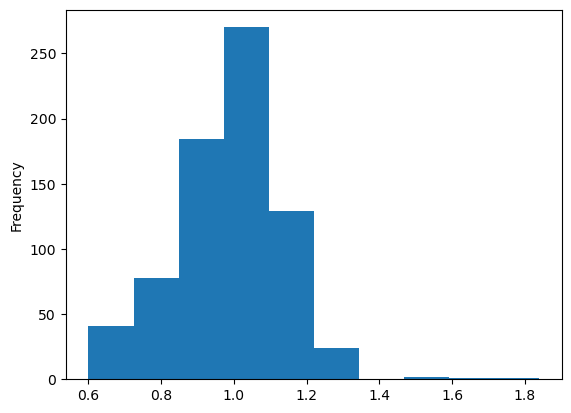

In [7]:
# Plot a histogram to visualize the distribution of the funding rates
funding_rate.plot(kind="hist")

## Step 6: Use the `loc` function to create a new DataFrame that includes the data only from 2020. This new DataFrame should include all the columns of data. Review this 2020 DataFrame by creating a box plot to determine how the data was distributed during 2020.

In [8]:
# Using the loc function, create a DataFrame that includes data only from 2020
# This DataFrame should include all columns and rows of data
rates_2020_df = lending_rates_df.loc['2020-01-01':'2020-12-31']

# Review the first 5 rows of the rates_2020_df` DataFrame 
rates_2020_df.head()

,Funding Rate,Prime Rate,Retail Rate,Sub-prime Rate
Date,,,,
2020-01-01,1.03,2.98,5.37,7.56
2020-01-02,1.05,3.00,5.34,7.73
2020-01-03,1.07,2.99,5.32,7.93
2020-01-04,1.09,2.98,5.28,7.96
2020-01-05,1.10,2.99,5.21,7.95


<AxesSubplot:>

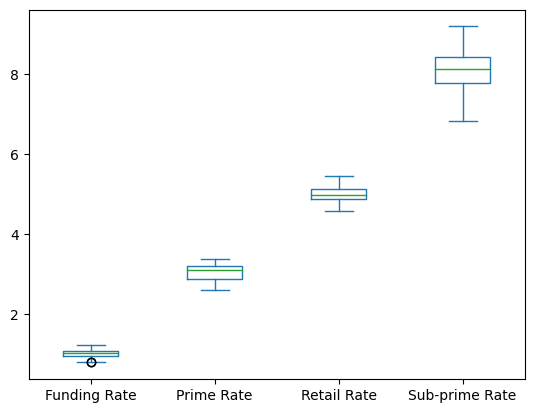

In [14]:
# Create a box plot that visualizes the distribution of the different rates over 2020
rates_2020_df.plot(kind='box')

**Question:** Based on the box-plot visualization, what category of rates exhibited the largest distribution for 2020? What category of rates exhibit the smallest distribution for 2020?

**Answer:** It looks like the `Sub-prime Rate` customers have the largest distribution of interest rate values over 2020. The `Funding Rate` category show the narrowest distribution of rates. 

## Step 7: Use conditional statements to filter and analyze the 2020 DataFrame. The goal is to compare the bank’s profits from the times that the funding rates were greater than or equal to 1% to the times that they were less than 1%.

In [15]:
# Add a conditional statement to the `rates_2020_df` DataFrame
# Keep only days when `Funding Rate` is  greater than or equal to 1.00%
high_filter_rates = rates_2020_df['Funding Rate'] >= 1.00

# Create a subset of the `rates_2020_df` DataFrame using the loc function 
# in conjunction with the conditional statement that includes only funding rates
# that are greater than or equal to 1%
high_funding_rates_df = rates_2020_df.loc[high_filter_rates]

# Review the first 5 rows of the `high_funding_rates_df` DataFrame 
high_funding_rates_df.head()

,Funding Rate,Prime Rate,Retail Rate,Sub-prime Rate
Date,,,,
2020-01-01,1.03,2.98,5.37,7.56
2020-01-02,1.05,3.00,5.34,7.73
2020-01-03,1.07,2.99,5.32,7.93
2020-01-04,1.09,2.98,5.28,7.96
2020-01-05,1.10,2.99,5.21,7.95


In [11]:
# Use thed describe function to generate summary statistics of the `high_funding_rates` DataFrame.
high_funding_rates_df.describe()

,Funding Rate,Prime Rate,Retail Rate,Sub-prime Rate
count,223.000000,223.000000,223.000000,223.000000
mean,1.058610,3.079103,4.937892,8.102466
std,0.049886,0.186234,0.148799,0.455891
min,1.000000,2.680000,4.590000,6.820000
25%,1.025000,2.930000,4.850000,7.845000
50%,1.050000,3.150000,4.930000,8.130000
75%,1.080000,3.230000,5.040000,8.405000
max,1.220000,3.360000,5.370000,9.190000


In [12]:
# Add a conditional statement to the `rates_2020_df` DataFrame
# Keep only days when `Funding Rate` is  less than 1.00%.
low_filter_rates = rates_2020_df['Funding Rate'] < 1.00

# Create a subset of the `rates_2020_df` DataFrame using the loc function 
# in conjunction with the conditional statement that includes only funding rates
# that are less than 1%
low_funding_rates_df = rates_2020_df.loc[low_filter_rates]

# Review the first 5 rows of the `low_funding_rates_df` DataFrame 
low_funding_rates_df.head()

,Funding Rate,Prime Rate,Retail Rate,Sub-prime Rate
Date,,,,
2020-01-13,0.96,3.12,5.16,7.96
2020-01-14,0.95,3.13,5.23,7.96
2020-01-15,0.93,3.09,5.28,7.96
2020-01-16,0.91,3.06,5.30,8.05
2020-01-17,0.92,3.02,5.35,8.16


In [13]:
# Use the describe function to generate summary statistics of the `low_funding_rates` DataFrame.
low_funding_rates_df.describe()

,Funding Rate,Prime Rate,Retail Rate,Sub-prime Rate
count,142.000000,142.000000,142.000000,142.000000
mean,0.920845,2.964789,5.064225,8.095986
std,0.053136,0.195658,0.227821,0.417543
min,0.780000,2.590000,4.570000,7.340000
25%,0.880000,2.760000,4.922500,7.740000
50%,0.930000,3.030000,5.120000,8.095000
75%,0.960000,3.110000,5.230000,8.427500
max,0.990000,3.300000,5.450000,8.960000


**Question:** What does the average profit spread, across the banks different clients, look like on days in 2020 when the Funding Rate is less than 1% versus when the Funding Rate is greater than or equal to 1%?

**Answer:** Based on the above information above, the bank earns larger profits when the Funding Rate is less than 1% than it does when the rates are greater than 1%. When the Funding Rates are less than 1%, the bank earns an average spread of 2.04% on Prime (2.96-0.92), 4.14% on Retail and 7.17% on Sub-prime. In contrast, when the Funding Rates are greater than 1%, the bank earns an average spread of 2.01% on Prime (3.07-1.06), 3.88% on Retail, and 7.03% on Sub-prime.  